In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pm-85140264-at-06-18-2025-19-10-39/__script__.py
/kaggle/input/pm-85140264-at-06-18-2025-19-10-39/joblib-1.5.1-py3-none-any.whl
/kaggle/input/pm-85140264-at-06-18-2025-19-10-39/scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pm-85140264-at-06-18-2025-19-10-39/__results__.html
/kaggle/input/pm-85140264-at-06-18-2025-19-10-39/input_requirements.txt
/kaggle/input/pm-85140264-at-06-18-2025-19-10-39/numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl
/kaggle/input/pm-85140264-at-06-18-2025-19-10-39/threadpoolctl-3.6.0-py3-none-any.whl
/kaggle/input/pm-85140264-at-06-18-2025-19-10-39/scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pm-85140264-at-06-18-2025-19-10-39/__script__.ipynb
/kaggle/input/pm-85140264-at-06-18-2025-19-10-39/__output__.json
/kaggle/input/pm-85140264-at-06-18-2025-19-10-39/install_requirements.sh
/kaggle/input/pm-85140264-at-06-18-2025-19-10-39/custom.css
/kaggle/input/wholesale

In [2]:
#importing necessary librarires
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
def load_data(filepath):
    if filepath.endswith('.csv'):
        return pd.read_csv(filepath)
    elif filepath.endswith('.xlsx'):
        return pd.read_excel(filepath)
    else:
        print('Providen xlsx/ csv file')
        return None

In [4]:
main_df=load_data(r'/kaggle/input/wholesale-customers-data-set/Wholesale customers data.csv')

In [5]:
df=main_df.copy()

# Description about column names
1. FRESH: annual spending (m.u.) on fresh products (Continuous)
2. MILK: annual spending (m.u.) on milk products (Continuous)
3. GROCERY: annual spending (m.u.)on grocery products (Continuous)
4. FROZEN: annual spending (m.u.)on frozen products (Continuous)
5. DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6. DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7. CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©)(1) or Retail channel (Nominal)(2)
8. REGION: customersâ€™ Region â€“ Lisnon(1), Oporto(2) or Other (Nominal)(3)

**Observation from clustering**    I have added it for easier refference, below are observed analysis after performing clustering, feel free to add your coments.

Reason: I considered this dataset for **interpretation** since dataset size is very less and labeling this dataset doesnt made any sense to me.


* Other regions - Retail section consuming less amount of frozen(Cluster 0) and more cosumption of Detergents_paper and Grocery(High consumption is justfiable since it is retail section)
* Most of sales happening in Other regions(Horeca) and the sales are very well spread but in seling Detergents_paper and Delicassen we can still focus(Cluster 1)
* Sales happening in Horeca in Lisbon region and we can improve sales of Delicassen which is less than average sales of Delicassen in overall country(Cluster 3)
* We can imporove sales of Retail section in Lisbon city and consumption of grocery is very high than entire sales average
* Retail section dominates our Grocery Detergents_paper Milk and Delicassen sales whereas Horeca section dominates
* Though milk sales in Horeca Region is less, it is justifiable since Horeca wont cosumes much milk (NA to Cafe)






Process:
* I tried with minmax scaling and both standard scaler.Many features contains outliers, so i tried with some transformations . But without transformation outputs are easily intrepretable.
* For scaling, I used MinMaxscaling though it is sensitive to outliers. Since i considered for intrepretation, this gave good results and good silhouette score(greater than 0.6)

Feature plan:
I tried only with DBSCAN, still we can try with Hierarchial clustering or other variants of DBSCAN such as HDBSCAN, OPTICS

In [6]:
def pre_analysis(df):

    out=pd.DataFrame(columns=['Feature','Data_type','Missing_values_%','Duplicates_%','Unique_values_count'])
    for i in df.columns:
        
        #dtype of column
        dtype= df[i].dtype

        #missing values 
        miss_values=df[i].isna().sum() * 100

        #duplicated values
        duplicated_values=df.duplicated().sum() / len(df) *100

        #unique_values_count
        unique_values=df[i].nunique()

        out=pd.concat([out, pd.DataFrame({'Feature':i,'Data_type':dtype ,
                                          'Missing_values_%':miss_values,
                                          'Duplicates_%':duplicated_values,
                                          'Unique_values_count':unique_values,
                                            },index=[0]) ])
    
    return out.reset_index(drop=True)

In [7]:
pre_analysis(df)

,Feature,Data_type,Missing_values_%,Duplicates_%,Unique_values_count
0,Channel,int64,0,0.0,2
1,Region,int64,0,0.0,3
2,Fresh,int64,0,0.0,433
3,Milk,int64,0,0.0,421
4,Grocery,int64,0,0.0,430
5,Frozen,int64,0,0.0,426
6,Detergents_Paper,int64,0,0.0,417
7,Delicassen,int64,0,0.0,403


In [8]:
df['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

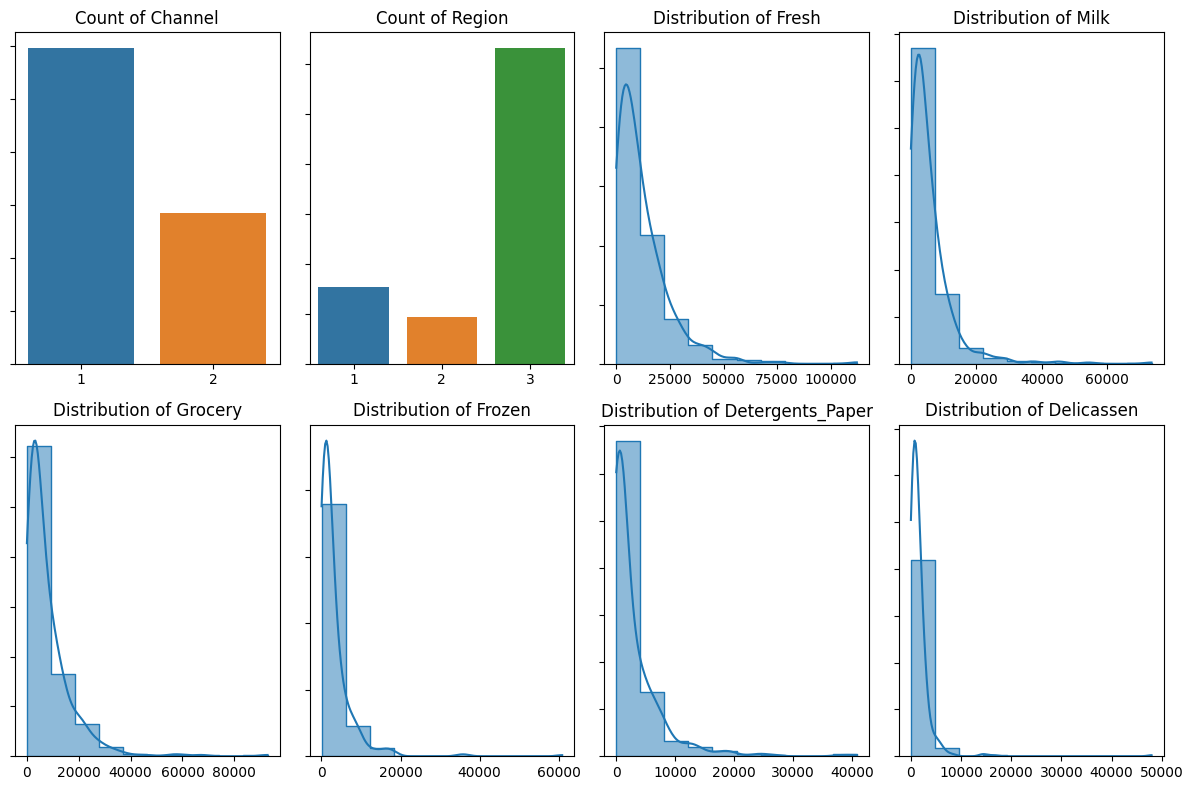

In [9]:
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(12,8))
for index,col in enumerate(df.columns):
    if (df[col].dtype=='int' or df[col].dtype=='float') and df[col].nunique()>5:
        plot=sns.histplot(data=df,x=col,element='step',
                          bins=df[col].nunique()//40,kde=True,
                          ax=ax[index//4,index%4],legend=False).set(xlabel=None,yticklabels=[],ylabel=None,title=f'Distribution of {col}')
        
    elif df[col].dtype=='object':
        plot=sns.histplot(data=df,x=col,
                          element='step',
                          ax=ax[index//4,index%4],legend=False).set(xlabel=None,yticklabels=[],ylabel=None,title=f'Distribution of {col}')
    else:
        plot=sns.countplot(data=df,x=col,
                         
                          ax=ax[index//4,index%4]).set(xlabel=None,yticklabels=[],ylabel=None,title=f'Count of {col}')       
plt.tight_layout()
plt.show()


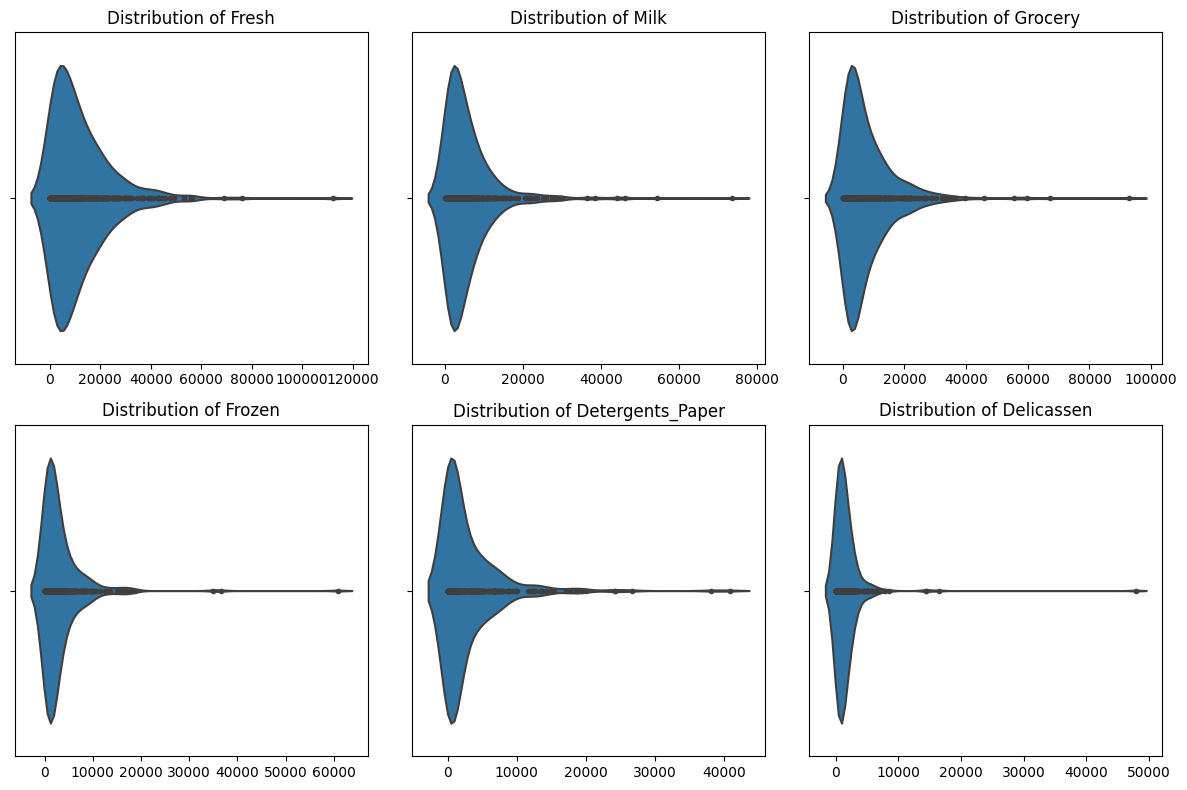

In [10]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(12,8))
for index,col in enumerate([i for i in df.columns if df[i].nunique()>10]):
    if (df[col].dtype=='int' or df[col].dtype=='float') and df[col].nunique()>5:
        plot=sns.violinplot(data=df,x=col,
                          ax=ax[index//3,index%3],inner='point',fill=False).set(xlabel=None,yticklabels=[],ylabel=None,title=f'Distribution of {col}')
        
plt.tight_layout()
plt.show()

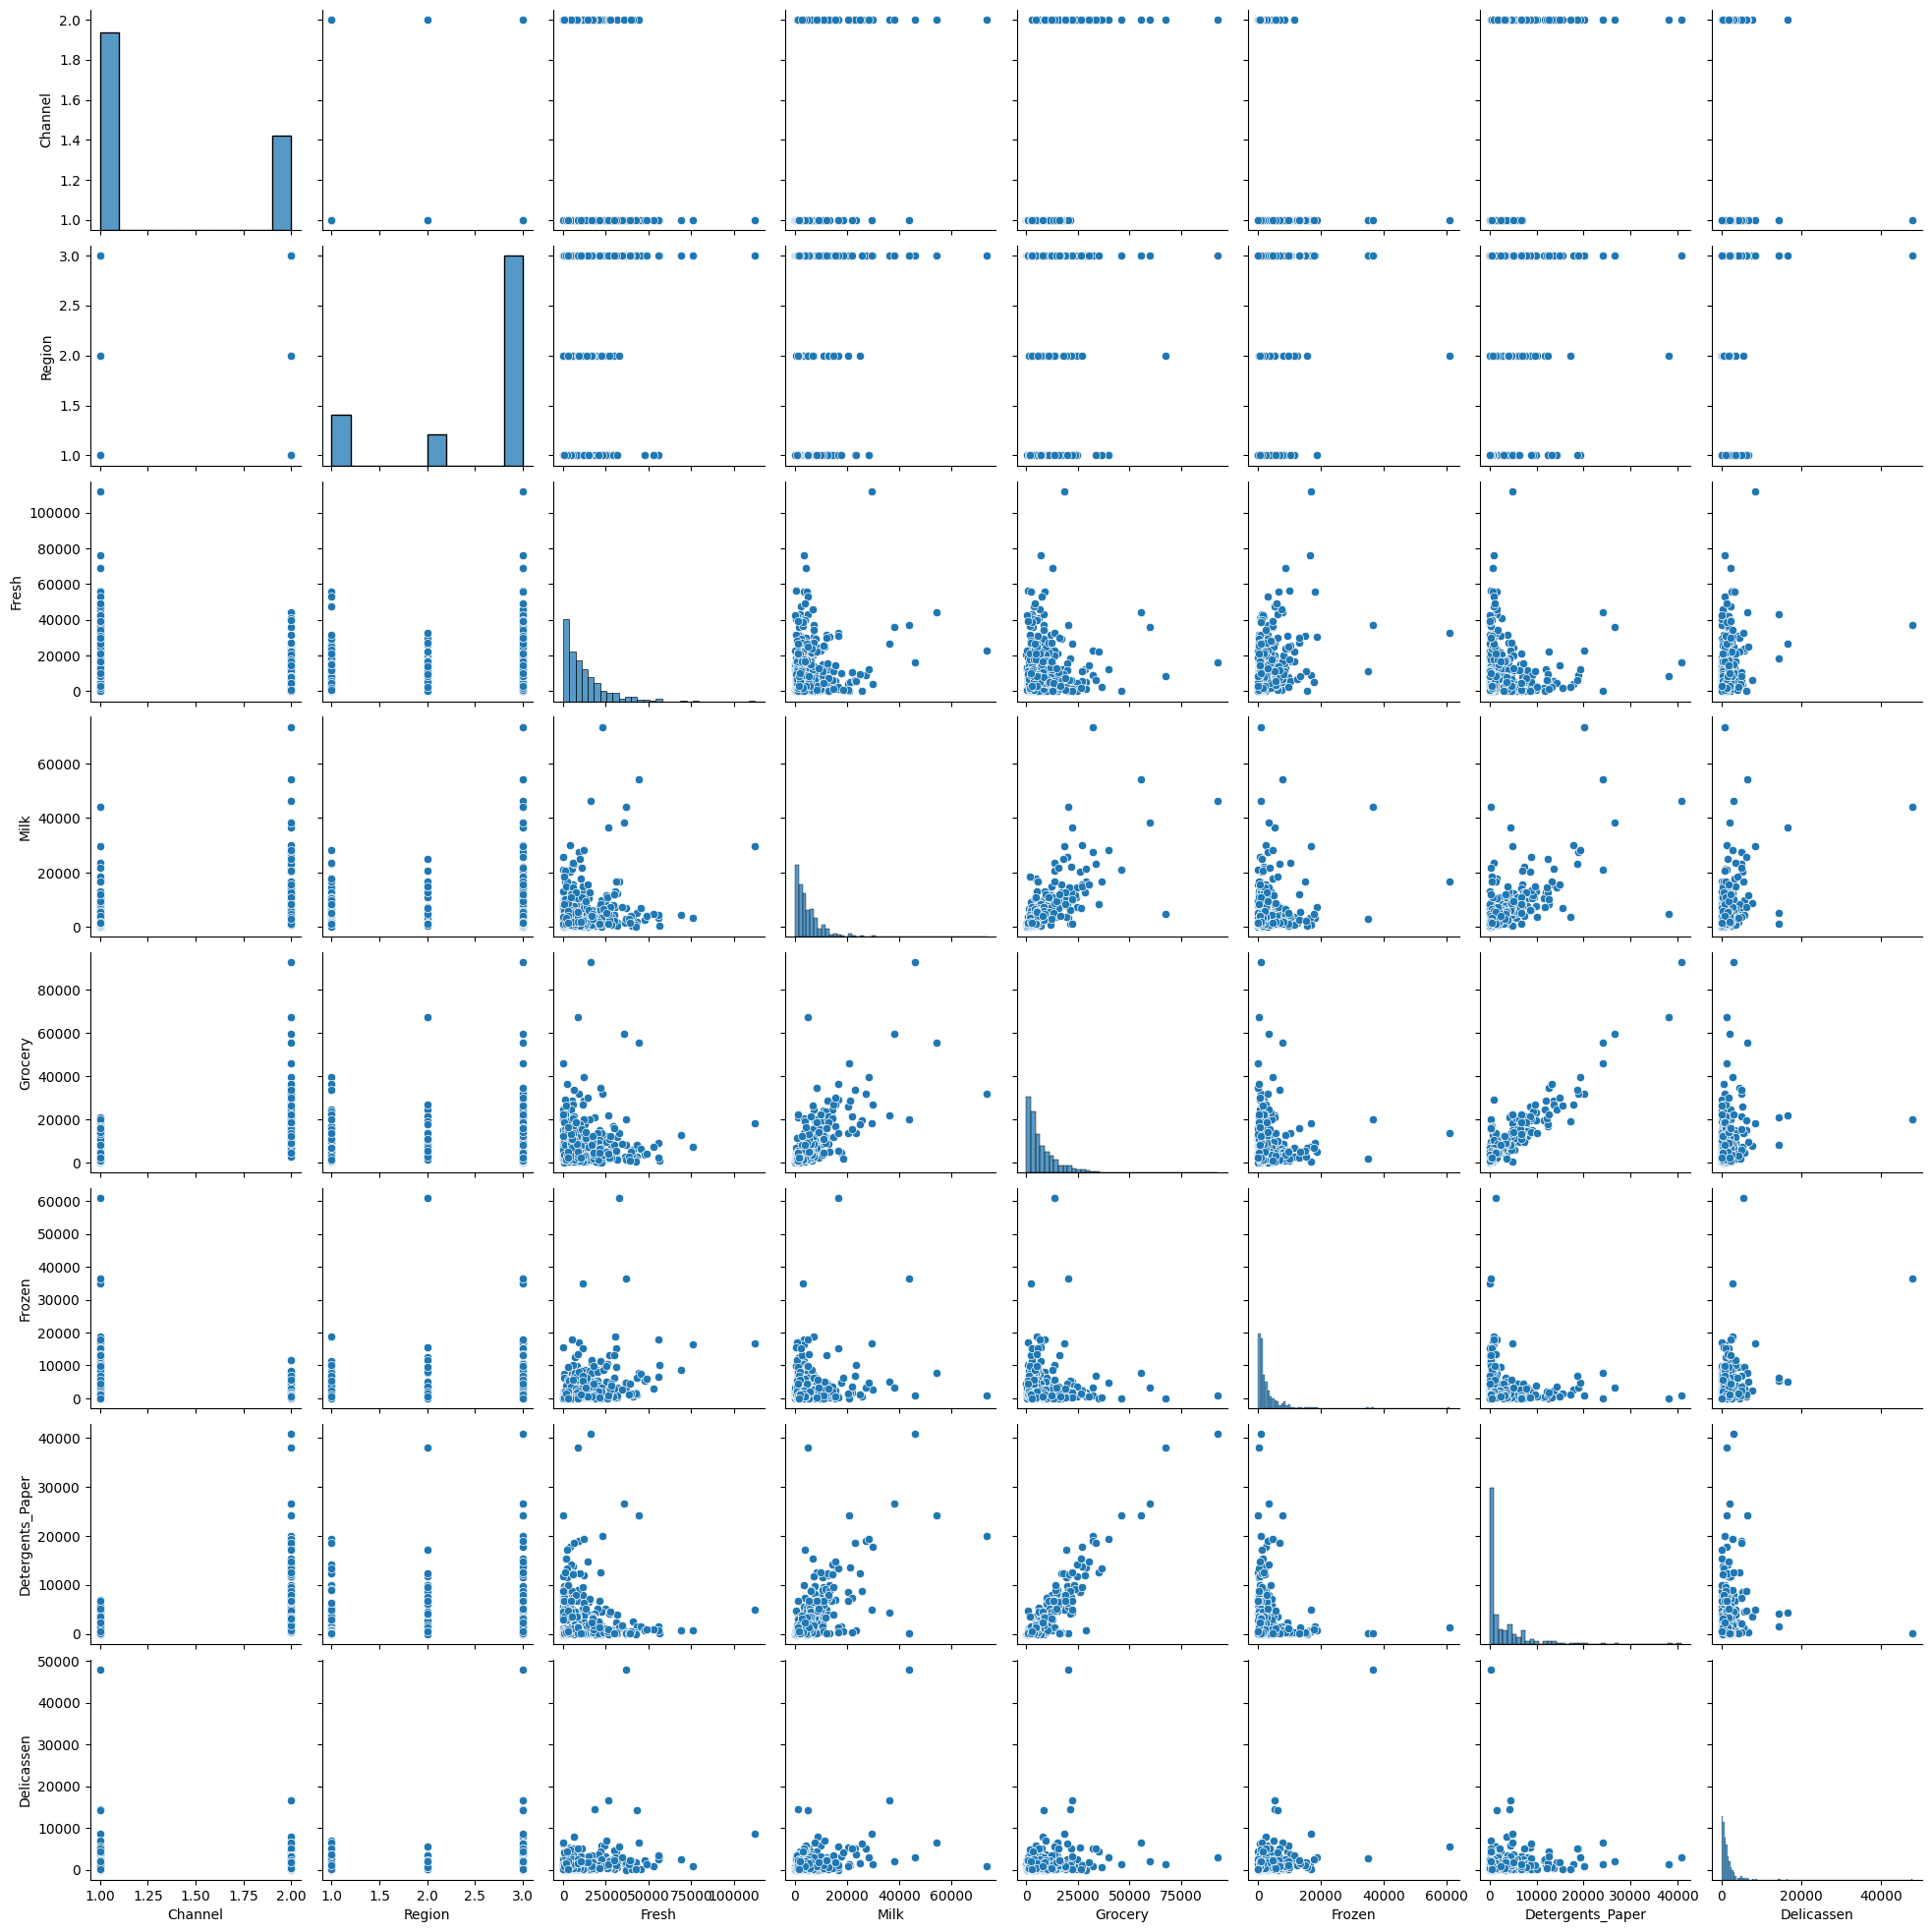

In [11]:
sns.pairplot(df,diag_kind='hist')

In [12]:
log_df=np.log(df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])

In [13]:
for index,col in enumerate([i for i in df.columns if df[i].nunique()>10]):
    print(f"Skewness of {col} is {df[col].skew()}")
    print(f"Kurtosis of {col} is {df[col].kurtosis()}")
    print()

Skewness of Fresh is 2.561322751927935
Kurtosis of Fresh is 11.536408493056006

Skewness of Milk is 4.053754849210879
Kurtosis of Milk is 24.66939775067306

Skewness of Grocery is 3.5874286903915453
Kurtosis of Grocery is 20.914670390919653

Skewness of Frozen is 5.9079856924559575
Kurtosis of Frozen is 54.68928069737255

Skewness of Detergents_Paper is 3.6318506306913645
Kurtosis of Detergents_Paper is 19.009464335418212

Skewness of Delicassen is 11.151586478906117
Kurtosis of Delicassen is 170.69493933454066



In [14]:
for index,col in enumerate([i for i in log_df.columns if df[i].nunique()>10]):
    print(f"Skewness of {col} is {log_df[col].skew()}")
    print(f"Kurtosis of {col} is {log_df[col].kurtosis()}")
    print()

Skewness of Fresh is -1.629684538630425
Kurtosis of Fresh is 4.435698437875853

Skewness of Milk is -0.22694102571200728
Kurtosis of Milk is 0.21927220003507442

Skewness of Grocery is -0.7396615231603971
Kurtosis of Grocery is 3.7025917354634257

Skewness of Frozen is -0.36080554399201303
Kurtosis of Frozen is 0.2878041286991797

Skewness of Detergents_Paper is -0.27213243386642677
Kurtosis of Detergents_Paper is -0.18748449526913857

Skewness of Delicassen is -1.1771712036024342
Kurtosis of Delicassen is 3.1584620990733208



array([[<Axes: title={'center': 'Fresh'}>,
        <Axes: title={'center': 'Milk'}>],
       [<Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>]], dtype=object)

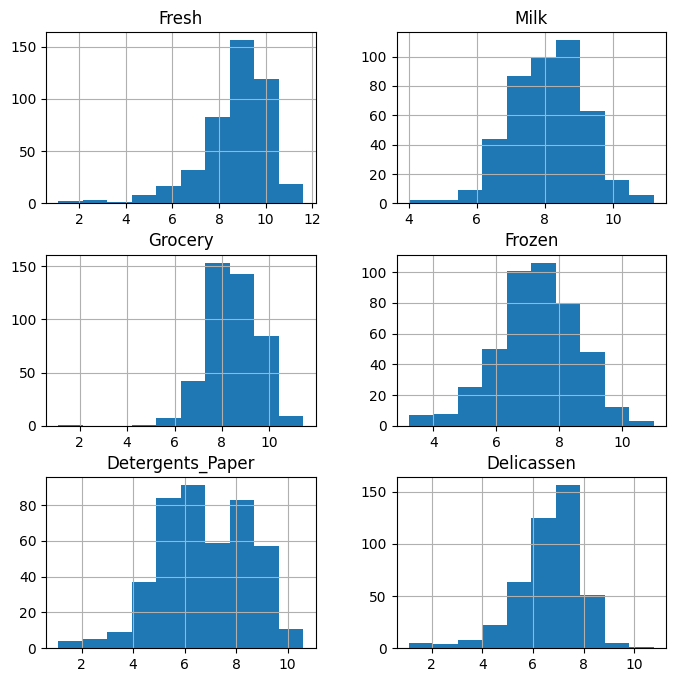

In [15]:
log_df.hist(figsize=(8,8))

In [16]:
log_df[['Channel','Region']]=df[['Channel','Region']].copy()


In [17]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import plotly.express as px


# Outliers
* There are 4 to 5 outliers in numerical features. Lets see how can we handle this
* Distribution of our numerical features are right skewed
* After logging, data is normally distributed

   

Since we have outliers, i planned to go with below approaches
1. No outlier removal with DBSCAN with both type of scaling
2. No outlier removal with DBSCAN with both type of scalling (log transformation)
3. Outlier encapsulated with Kmeans

# No out lier removal without log transformation of skewed features

I have run below things and results are found below

* scaling	      eps	 minimum_samples	silhouete_score
* minmaxscaler	  0.372	  16	            0.607414
* minmaxscaler	  0.372	   9	            0.619686
* minmaxscaler	  0.37	  12	            0.595132
* standardscaling	2	   9	            0.363789
* standardscaling	2	  12	            0.361859
* standardscaling	2	  16	            0.359957


# No outlier removal with log of transformation
scaling	            eps	minimum_samples	silhouete_score
* standardscaling	1.8	    9	            0.290434
* standardscaling	1.9	    12	            0.295035
* standardscaling	1.8	    16	            0.274382
* minmaxscaler	    0.21	6	            0.239598
* minmaxscaler	    0.21	9	            0.188348
* minmaxscaler	    0.35	12	            0.363059
* minmaxscaler	    0.3	    16	            0.359667


# Choice of scaling

Minmaxscaler(X-Xmin)/(Xmax-Xmin): It  transforms our data in between 0 and 1 .Since we have outlier in our features,it might crush our dataset towards minimum value. 

Standardscaler(X- mean)/std : It will normalise our data and normalise our data. 

Lets try with both type :
From obove observation, using log is not good option. I am planned to do for min samples value from 9 to 16 .

In [18]:
scaler=StandardScaler().fit(df)
df_ss=scaler.transform(df)

scaler=MinMaxScaler().fit(df)
df_mm=scaler.transform(df)

# Visualisation of clusters

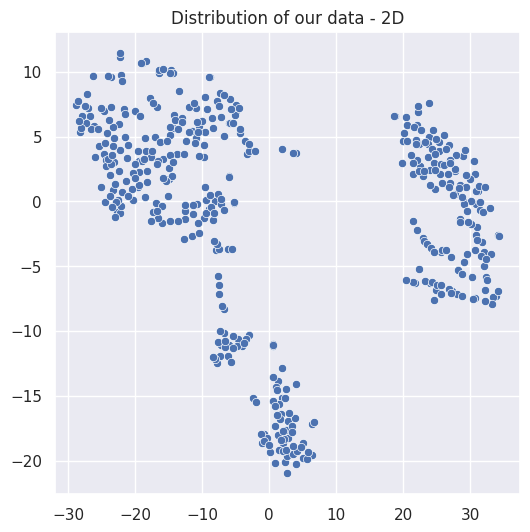

In [19]:
tsne=TSNE(perplexity=35,n_components=2).fit(df_ss)
compressed_df=tsne.fit_transform(df_ss)
plt.figure(figsize=(6,6))
sns.set_theme()
sns.scatterplot(x=compressed_df[:,0],y=compressed_df[:,1],
                palette='Set1').set_title('Distribution of our data - 2D')
plt.show()

**Choosing parameters such as epsilon and min samples are important in DBSCAN**
For Min_Samples
1. As a rule of thumb,Min samples can be no of features * 2 or no of features +1
2. Plotting K graph and taking elbow distance

In [20]:

def plot_k_graph(df_scaled,min_sample,title=''):
    nn=NearestNeighbors(n_neighbors=min_sample).fit(df_scaled)
    distance,_=nn.kneighbors()
    distance=np.sort(distance,axis=0)
    fig=px.line(distance[:,1],title=title + f'K Plot with {min_sample} nieghbours')
    fig.show()

def visualise_cluster(df_scaled,labels,title=' ',ax=None):
    tsne=TSNE(perplexity=20,n_components=2).fit(df_scaled)
    compressed_df=tsne.fit_transform(df_scaled)
    np.unique(labels)
    plt.figure(figsize=(6,6))
    sns.set_theme()
    sns.scatterplot(x=compressed_df[:,0],y=compressed_df[:,1],
                    hue=labels,palette='Set1',ax=ax).set_title(title)
    plt.show()

In [21]:
#MinMaxscaler
for sample in range(6,18):
    plot_k_graph(df_scaled=df_mm,min_sample=sample,title='Min_max_scalling ')


In [22]:
#From above graphs,it is very clear that elbo value is 0.186 which we use it as epsilon
epsilon=0.186
min_max_results={}
for index,sample in enumerate(range(6,18)):
    dbscan=DBSCAN(min_samples=sample,eps=epsilon)
    labels=dbscan.fit_predict(df_mm)
    sil_score=silhouette_score(df_mm,labels)
    result={sample:{'scaling':'min_max_scaler','eps':epsilon,'minimum_samples':sample,'silhouete_score':sil_score,'Unique_labels':len(set(labels))}}
    min_max_results.update(result)


In [23]:
pd.DataFrame(min_max_results).T

,scaling,eps,minimum_samples,silhouete_score,Unique_labels
6,min_max_scaler,0.186,6,0.624835,7
7,min_max_scaler,0.186,7,0.622849,7
8,min_max_scaler,0.186,8,0.619686,7
9,min_max_scaler,0.186,9,0.619686,7
10,min_max_scaler,0.186,10,0.615885,7
11,min_max_scaler,0.186,11,0.611153,7
12,min_max_scaler,0.186,12,0.59686,7
13,min_max_scaler,0.186,13,0.610548,5
14,min_max_scaler,0.186,14,0.610548,5
15,min_max_scaler,0.186,15,0.610548,5


In [24]:
#Standardscaler
for sample in range(6,18):
    plot_k_graph(df_scaled=df_ss,min_sample=sample,title='standard_scalling ')

In [25]:
#From above graphs,it is very clear that elbo value is 0.186 which we use it as epsilon
epsilon=2.05
ss_results={}
for index,sample in enumerate(range(6,18)):
    dbscan=DBSCAN(min_samples=sample,eps=epsilon)
    labels=dbscan.fit_predict(df_ss)
    sil_score=silhouette_score(df_ss,labels)
    result={sample:{'scaling':'standard_scaler','eps':epsilon,'minimum_samples':sample,'silhouete_score':sil_score,'Unique_labels':len(set(labels))}}
    ss_results.update(result)


In [26]:
pd.DataFrame(ss_results).T


,scaling,eps,minimum_samples,silhouete_score,Unique_labels
6,standard_scaler,2.05,6,0.364009,3
7,standard_scaler,2.05,7,0.363509,3
8,standard_scaler,2.05,8,0.363382,3
9,standard_scaler,2.05,9,0.36396,3
10,standard_scaler,2.05,10,0.362037,3
11,standard_scaler,2.05,11,0.362037,3
12,standard_scaler,2.05,12,0.362037,3
13,standard_scaler,2.05,13,0.362037,3
14,standard_scaler,2.05,14,0.362037,3
15,standard_scaler,2.05,15,0.362037,3


# Final model and visualisation

In [27]:
#Final choosen value and model
Epsilon=0.186 
minimum_pts=9
scalling=MinMaxScaler()
final_model=DBSCAN(eps=0.186,min_samples=minimum_pts).fit(df_mm)
labels=final_model.fit_predict(df_mm)
df['labels']=labels


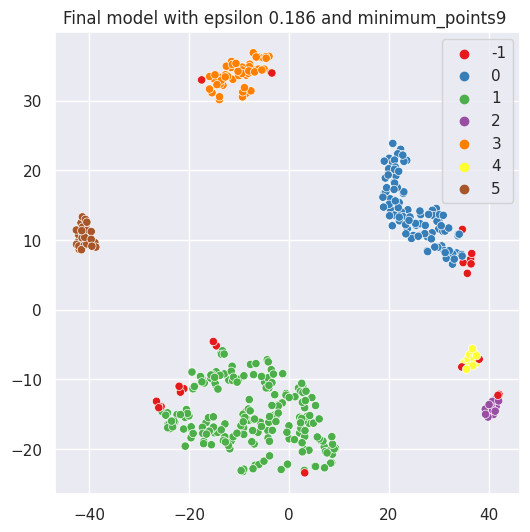

In [28]:
visualise_cluster(df_scaled=df_mm,labels=labels,title=f'Final model with epsilon {Epsilon} and minimum_points{minimum_pts} ')


# Final Observation

In [29]:
pd.set_option('display.max_columns',100)

In [30]:
df.pivot_table(columns=['labels'],aggfunc=['count','mean','max','min'],sort=True)

count                                   mean                \
labels              -1   0    1   2   3   4   5            -1             0   
Channel             24  99  202  16  56  16  27      1.458333      2.000000   
Delicassen          24  99  202  16  56  16  27   6538.833333   1631.080808   
Detergents_Paper    24  99  202  16  56  16  27  10303.458333   5899.828283   
Fresh               24  99  202  16  56  16  27  32543.458333   8953.535354   
Frozen              24  99  202  16  56  16  27  11244.291667   1420.676768   
Grocery             24  99  202  16  56  16  27  25800.708333  13810.505051   
Milk                24  99  202  16  56  16  27  21590.833333   8922.232323   
Region              24  99  202  16  56  16  27      2.416667      3.000000   

                                                                      \
labels                       1           2             3           4   
Channel               1.000000      2.0000      1.000000      2.0000   
Delicassen         1096.049505   1606.5000   1122.446429   1075.9375   
Detergents_Paper    750.935644   6878.1875    956.321429   6809.5625   
Fresh             12348.752475   4709.1875  11536.357143   6459.9375   
Frozen             3092.772277   2189.5000   2945.053571   1028.3125   
Grocery            3497.747525  16200.9375   3828.267857  13907.1250   
Milk               3067.074257   8915.8125   3487.375000   8977.8750   
Region                3.000000      1.0000      1.000000      2.0000   

                                   max                                     \
labels                       5      -1      0      1      2      3      4   
Channel               1.000000       2      2      1      2      1      2   
Delicassen          939.111111   47943   7844   5864   6372   6854   3508   
Detergents_Paper    453.481481   40827  18906   6907  14235   5828  17120   
Fresh             10870.296296  112151  40721  56159  20782  47493  27082   
Frozen             3703.407407   60869   8132  17866   8321  18711   1840   
Grocery            4053.629630   92780  34792  16483  36486  16966  26839   
Milk               1767.962963   73498  29892  18664  16599  17972  20655   
Region                2.000000       3      3      3      1      1      2   

                          min                                   
labels                5    -1     0   1     2    3     4     5  
Channel               1     1     2   1     2    1     2     1  
Delicassen         2602   818     3   3   120    7    59    51  
Detergents_Paper   1679    71   523   3   788    5  2208    15  
Fresh             29635    85    23   3    18  514   161     3  
Frozen            15601    36    33  25    61   91   364   264  
Grocery           11593  2062  4523   3  5265  489  5234  1330  
Milk               3696   928  1124  55  2527  258  1897   333  
Region                2     1     3   3     1    1     2     2

7. CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©)(1) or Retail channel (Nominal)(2)
8. REGION: customersâ€™ Region â€“ Lisnon(1), Oporto(2) or Other (Nominal)(3)

**OBSERVATIONS**
* Other regions - Retail section consuming less amount of frozen(Cluster 0) and more cosumption of Detergents_paper and Grocery(High consumption is justfiable since it is retail section)
* Most of sales happening in Other regions(Horeca) and the sales are very well spread but in seling Detergents_paper and Delicassen we can still focus(Cluster 1)
* Sales happening in Horeca in Lisbon region and we can improve sales of Delicassen which is less than average sales of Delicassen in overall country(Cluster 3)
* We can imporove sales of Retail section in Lisbon city and consumption of grocery is very high than entire sales average
* Retail section dominates our Grocery Detergents_paper Milk and Delicassen sales whereas Horeca section dominates
* Though milk sales in Horeca Region is less, it is justifiable since Horeca wont cosumes much milk (NA to Cafe)

**1st Cluster**

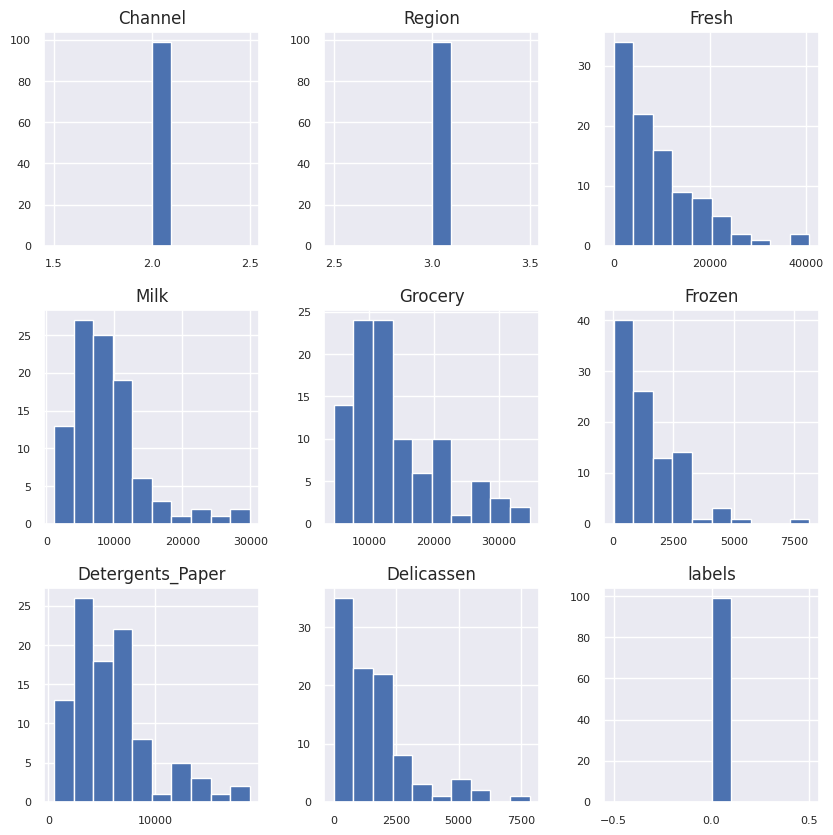

In [31]:

df[df['labels']==0].hist(figsize=(10,10),ylabelsize=8,xlabelsize=8);
#Data from Channel(Retail) and from other region who consumes very less amount of frozen type foods,

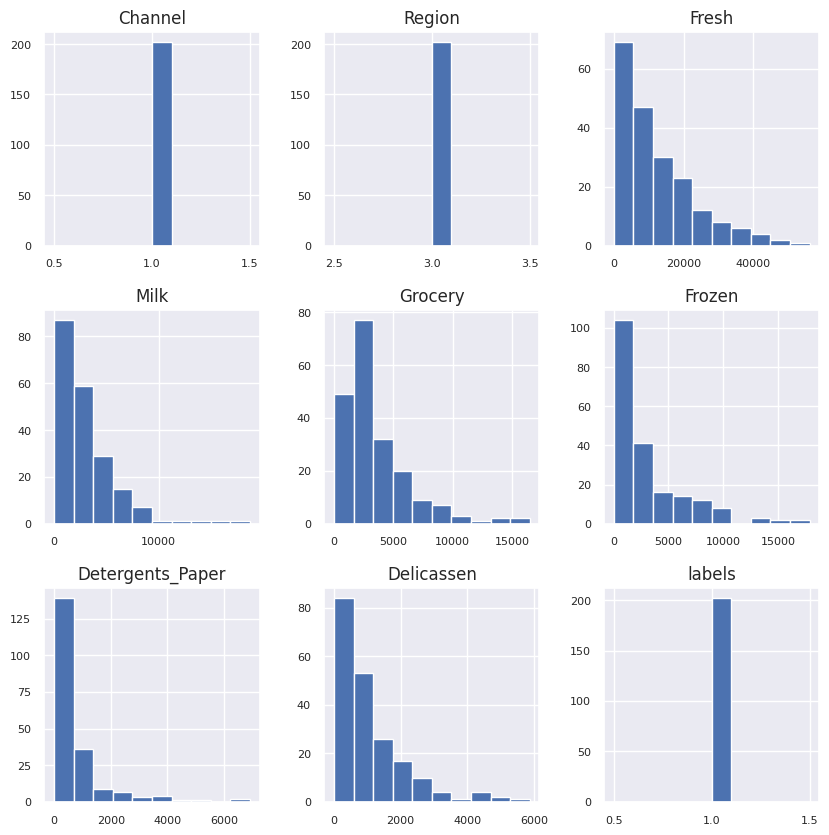

In [32]:
df[df['labels']==1].hist(figsize=(10,10),ylabelsize=8,xlabelsize=8);

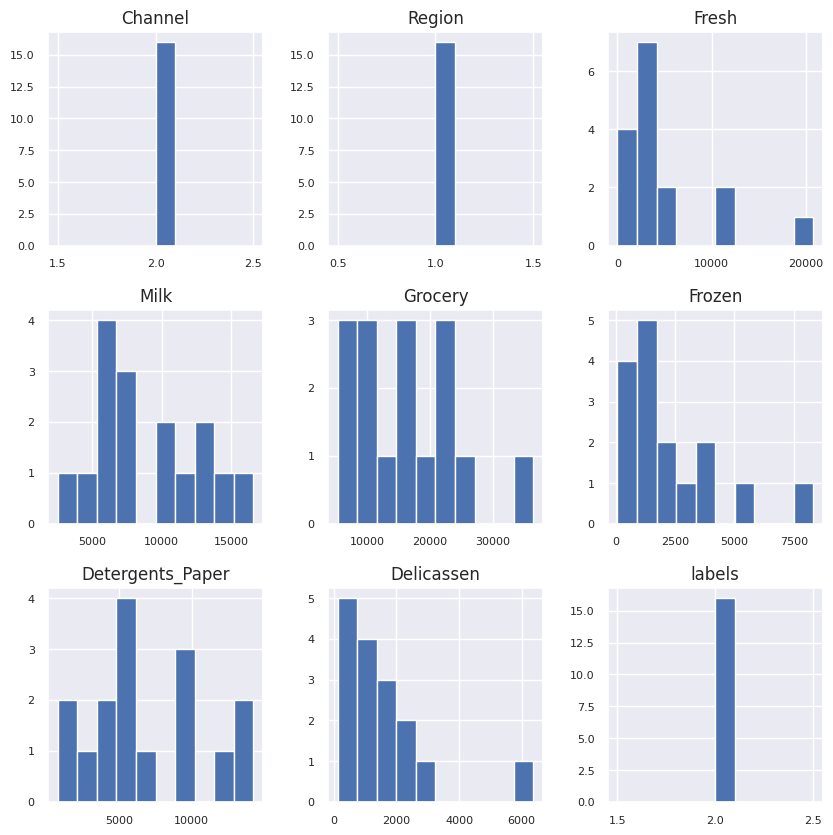

In [33]:
df[df['labels']==2].hist(figsize=(10,10),ylabelsize=8,xlabelsize=8);


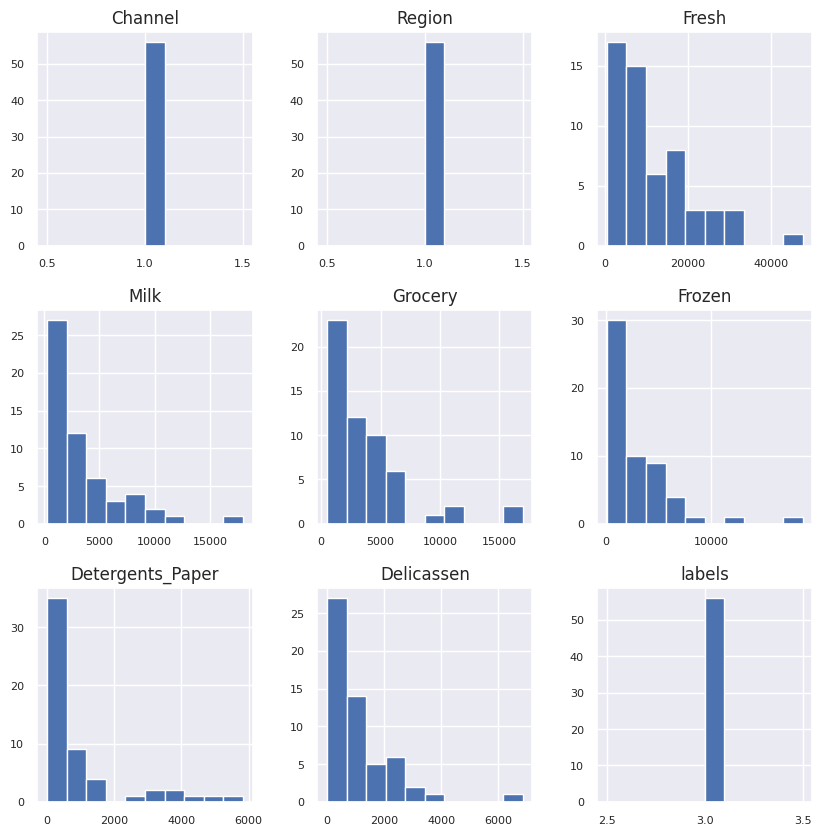

In [34]:
df[df['labels']==3].hist(figsize=(10,10),ylabelsize=8,xlabelsize=8);


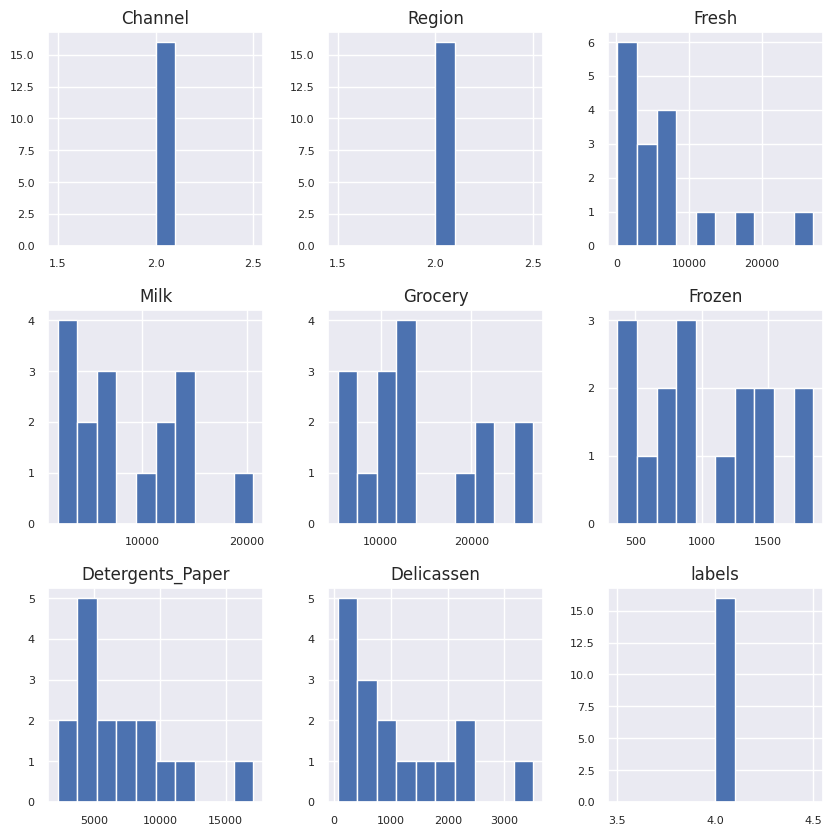

In [35]:
df[df['labels']==4].hist(figsize=(10,10),ylabelsize=8,xlabelsize=8);


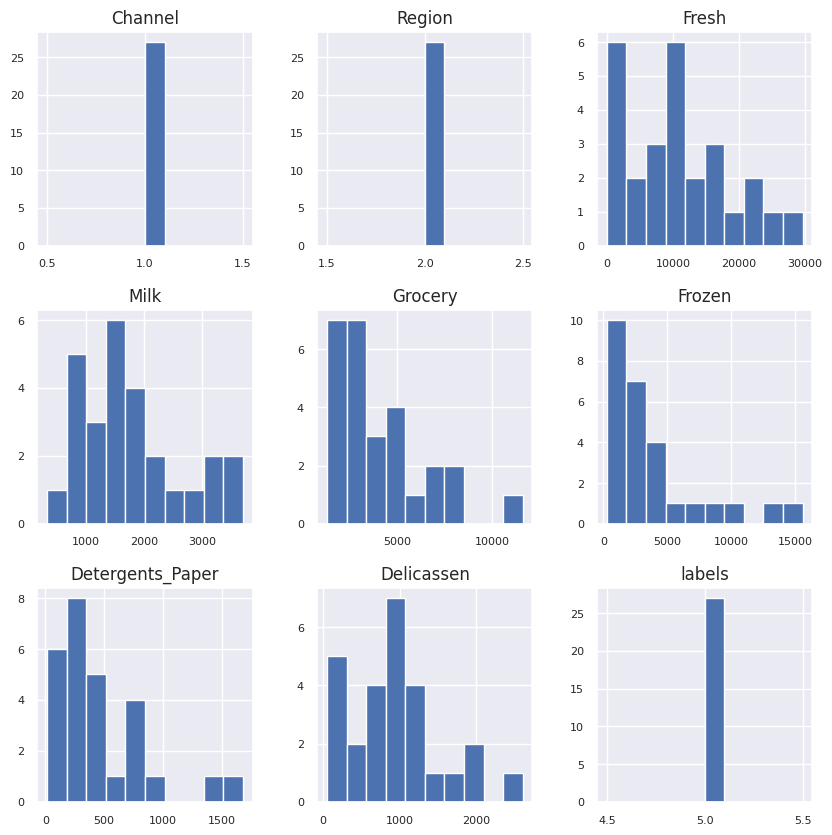

In [36]:
df[df['labels']==5].hist(figsize=(10,10),ylabelsize=8,xlabelsize=8);


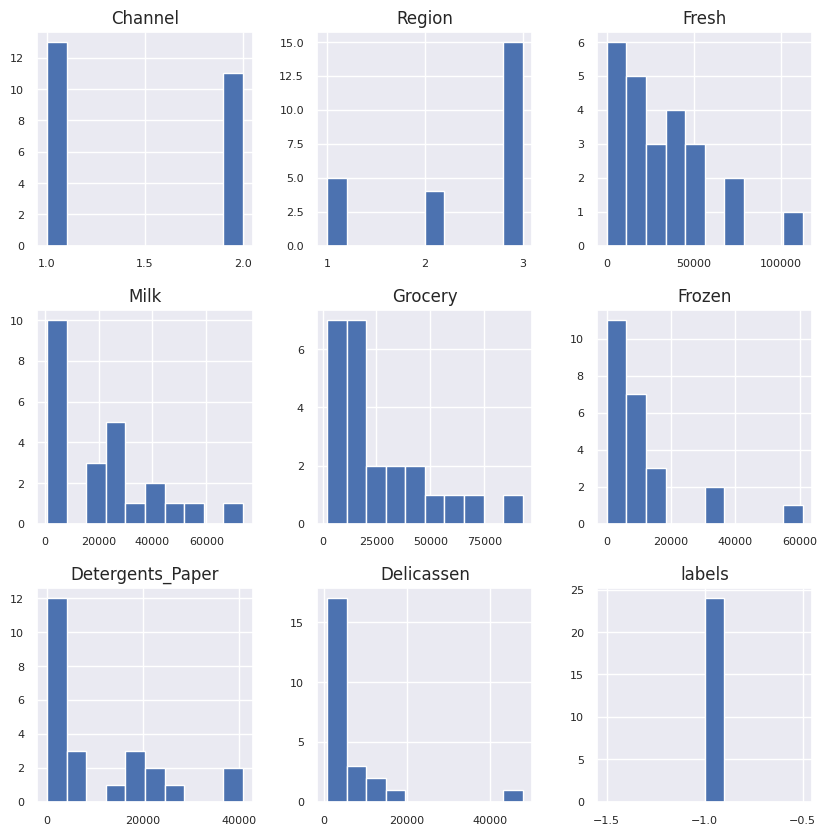

In [37]:
df[df['labels']==-1].hist(figsize=(10,10),ylabelsize=8,xlabelsize=8);
